# R.O.C.K.S

## Imports

In [1]:
!pip install nsepy --upgrade

  Stored in directory: /root/.cache/pip/wheels/88/89/1e/3dfa14f863314a42481d8926d9ef4825da5d899e026435fc3a
Successfully built nsepy


In [0]:
from nsepy import get_history
from datetime import date
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Selection

In [0]:
nifty = get_history(symbol="NIFTYIT", start=date(2015,1,1), end=date(2016,1,1), index=True)
tcs = get_history(symbol="TCS", start=date(2015,1,1), end=date(2016,1,1))
infy = get_history(symbol="INFY", start=date(2015,1,1), end=date(2016,1,1))

In [4]:
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [5]:
print(tcs.columns)
print(infy.columns)
print(nifty.columns)

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Turnover'], dtype='object')


In [0]:
#Keeping required columns
tcs.drop(['Symbol','Series','Prev Close','Last','VWAP','Turnover', 'Trades', 'Deliverable Volume','%Deliverble'],axis=1,inplace=True)
infy.drop(['Symbol','Series','Prev Close','Last','VWAP','Turnover', 'Trades', 'Deliverable Volume','%Deliverble'],axis=1,inplace=True)
nifty.drop(['Turnover'],axis=1,inplace=True)

In [7]:
print(tcs.columns)
print(nifty.shape)
print(tcs.shape)
print(infy.shape)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
(249, 5)
(249, 5)
(249, 5)


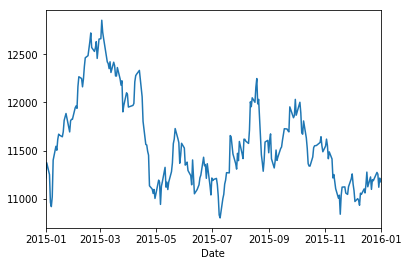

In [8]:
nifty['Close'].plot()

## Part1

### Moving Average for each stock and index

In [0]:
#changing index type to datetime
(tcs.index)=pd.to_datetime(tcs.index)
(nifty.index)=pd.to_datetime(nifty.index)
(infy.index)=pd.to_datetime(infy.index)

In [0]:
#Function to calculate moving average for a given window size
def moving_average(df,name):
  res=pd.DataFrame()
  #resampling the dates to weeks
  res['Close']=df.Close.resample('W').mean()
  for weeks in range(4,53,12):
    #calculating moving average
    res['Window_size ='+str(weeks)]=res.Close.rolling(window=weeks).mean()
  
  #plotting the result
  res.plot(title='Moving Average for {}'.format(name))
  #result has closing price for each window
  return res

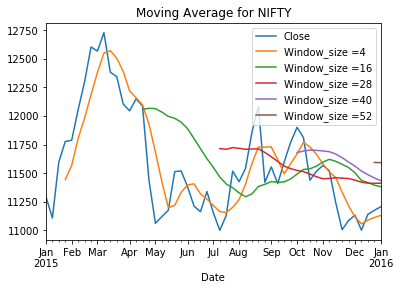

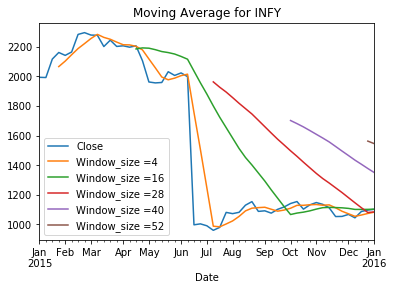

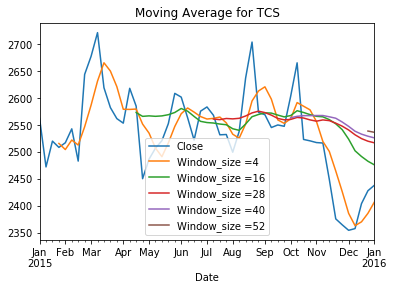

In [11]:
nifty_avg=moving_average(nifty,'NIFTY')
infy_avg=moving_average(infy,'INFY')
tcs_avg=moving_average(tcs,'TCS')

### Rolling Window Analysis

In [0]:
"""to handle stock market holidays we need to copy the values of last working day(Friday) and copy it to the holidays(SAT and SUN)"""
nifty=nifty.asfreq('D',method='ffill')
tcs=tcs.asfreq('D',method='ffill')
infy=infy.asfreq('D',method='ffill')
# Special holidays can be dealt using calender APIs like HOLID
# https://www.programmableweb.com/category/holidays/api

In [0]:
def rolling_window(df,name):
  #rolling window analysis 
  res=pd.DataFrame()
  
  res['Close']=df.Close
  #Rolling window for window_size 10
  res['Avg_10_Days']=df.Close.rolling(10).mean()
  #Rolling window analysis for window_size 75
  res['Avg_75_Days']=df.Close.rolling(75).mean()

  res.plot(title='rolling window plot of {} for 10 and 75 days'.format(name))
  return res

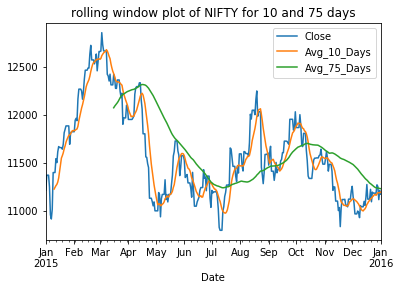

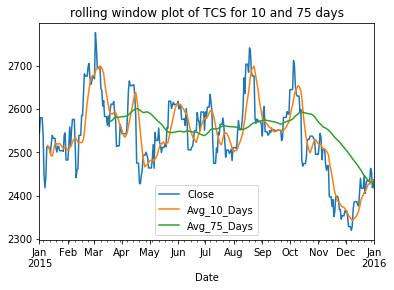

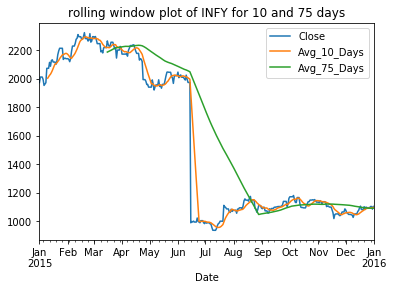

In [14]:
nifty_rw= rolling_window(nifty,'NIFTY')
tcs_rw= rolling_window(tcs,'TCS')
infy_rw= rolling_window(infy,'INFY')

### Dummy Series 



#### 1) Volume Shock and Direction

In [0]:
tcs.name='TCS'
infy.name='INFY'
nifty.name='NIFTY'

In [16]:
tcs.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,2567.0,2567.00,2541.00,2545.55,183415
2015-01-02,2551.0,2590.95,2550.60,2579.45,462870
2015-01-03,2551.0,2590.95,2550.60,2579.45,462870
2015-01-04,2551.0,2590.95,2550.60,2579.45,462870
2015-01-05,2581.0,2599.90,2524.65,2540.25,877121


In [57]:
#function to determine direction of volume shock 
#0 for -ve, 1 for +ve
def vs_direction_quer(df):
  if df.vol_shock==1:
    if (df.vol_next-df.Volume)>0:
      return 1
    else:
      return 0


#function to determine occurence of price shock
def volume_shock(df):
  #Creating new column to find volume traded next day and thus finding difference
  df['vol_next']=df.Volume.shift(1)
  #applying condition for volume shock
  df['vol_shock']=(abs((df.vol_next-df.Volume)/df.Volume)>0.1).astype(int)
  
  #applying condition for sirection of volume shock
  df['vol_shock_direction']='Nan'
  df['vol_shock_direction']=df.apply(vs_direction_quer,axis=1)
  print("\nVolume Shocks and Directions for {}\n".format(df.name))
  display(df)
  
volume_shock(nifty)


Volume Shocks and Directions for NIFTY



,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction,close_next,p_shock,p_shock_direction,price_without_volume_shocks
Date,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,NaN,0,NaN,NaN,0,NaN,0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,4246150.0,1,0.0,11215.70,0,NaN,0
2015-01-03,11214.65,11399.10,11214.65,11372.10,10004862,10004862.0,0,NaN,11372.10,0,NaN,0
2015-01-04,11214.65,11399.10,11214.65,11372.10,10004862,10004862.0,0,NaN,11372.10,0,NaN,0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,10004862.0,1,1.0,11372.10,0,NaN,0
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,8858018.0,1,0.0,11248.55,1,0.0,0
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,12515739.0,1,1.0,10959.90,0,NaN,0
2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,10976356.0,1,0.0,10916.00,0,NaN,0
2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,12975117.0,1,0.0,11018.15,1,1.0,0


In [18]:
volume_shock(nifty)
volume_shock(tcs)
volume_shock(infy)


Volume Shocks and Directions for NIFTY



,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction
Date,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,NaN,0,NaN
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,4246150.0,1,0.0
2015-01-03,11214.65,11399.10,11214.65,11372.10,10004862,10004862.0,0,NaN
2015-01-04,11214.65,11399.10,11214.65,11372.10,10004862,10004862.0,0,NaN
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,10004862.0,1,1.0



Volume Shocks and Directions for TCS



,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction
Date,,,,,,,,
2015-01-01,2567.0,2567.00,2541.00,2545.55,183415,NaN,0,NaN
2015-01-02,2551.0,2590.95,2550.60,2579.45,462870,183415.0,1,0.0
2015-01-03,2551.0,2590.95,2550.60,2579.45,462870,462870.0,0,NaN
2015-01-04,2551.0,2590.95,2550.60,2579.45,462870,462870.0,0,NaN
2015-01-05,2581.0,2599.90,2524.65,2540.25,877121,462870.0,1,0.0



Volume Shocks and Directions for INFY



,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction
Date,,,,,,,,
2015-01-01,1968.95,1982.00,1956.9,1974.4,500691,NaN,0,NaN
2015-01-02,1972.00,2019.05,1972.0,2013.2,1694580,500691.0,1,0.0
2015-01-03,1972.00,2019.05,1972.0,2013.2,1694580,1694580.0,0,NaN
2015-01-04,1972.00,2019.05,1972.0,2013.2,1694580,1694580.0,0,NaN
2015-01-05,2009.90,2030.00,1977.5,1995.9,2484256,1694580.0,1,0.0


#### 2) Price Shocks and Black Swan(3.2 and 3.3 are same)

In [0]:
#function to determine direction of price shock
#0 for -ve, 1 for +ve
def ps_direction_quer(df):
  if df.p_shock==1:
    if (df.Close-df.close_next)>0:
      return 1
    else:
      return 0
  

In [0]:
#function to check occurence of price shock
def price_shock(df):
  df['close_next']=df.Close.shift(1)
  df['p_shock']=((abs(df.Close-df.close_next)/df.Close) > 0.02).astype(int)
  
  #applying condition to determine the direction of price shock
  df['p_shock_direction']='Nan'
  df['p_shock_direction']=df.apply(ps_direction_quer,axis=1)
  print("\nPrice Shocks and Direction for {}".format(df.name))
  display(df.head(10))
  
  

In [21]:
price_shock(nifty)
price_shock(tcs)
price_shock(infy)


Price Shocks and Direction for NIFTY


,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction,close_next,p_shock,p_shock_direction
Date,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,NaN,0,NaN,NaN,0,NaN
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,4246150.0,1,0.0,11215.70,0,NaN
2015-01-03,11214.65,11399.10,11214.65,11372.10,10004862,10004862.0,0,NaN,11372.10,0,NaN
2015-01-04,11214.65,11399.10,11214.65,11372.10,10004862,10004862.0,0,NaN,11372.10,0,NaN
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,10004862.0,1,1.0,11372.10,0,NaN
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,8858018.0,1,0.0,11248.55,1,0.0
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,12515739.0,1,1.0,10959.90,0,NaN
2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,10976356.0,1,0.0,10916.00,0,NaN
2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,12975117.0,1,0.0,11018.15,1,1.0



Price Shocks and Direction for TCS


,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction,close_next,p_shock,p_shock_direction
Date,,,,,,,,,,,
2015-01-01,2567.0,2567.00,2541.00,2545.55,183415,NaN,0,NaN,NaN,0,NaN
2015-01-02,2551.0,2590.95,2550.60,2579.45,462870,183415.0,1,0.0,2545.55,0,NaN
2015-01-03,2551.0,2590.95,2550.60,2579.45,462870,462870.0,0,NaN,2579.45,0,NaN
2015-01-04,2551.0,2590.95,2550.60,2579.45,462870,462870.0,0,NaN,2579.45,0,NaN
2015-01-05,2581.0,2599.90,2524.65,2540.25,877121,462870.0,1,0.0,2579.45,0,NaN
2015-01-06,2529.1,2529.10,2440.00,2446.60,1211892,877121.0,1,0.0,2540.25,1,0.0
2015-01-07,2470.0,2479.15,2407.45,2417.70,1318166,1211892.0,0,NaN,2446.60,0,NaN
2015-01-08,2442.4,2449.00,2420.55,2443.80,782704,1318166.0,1,1.0,2417.70,0,NaN
2015-01-09,2455.0,2519.90,2450.00,2512.30,1598821,782704.0,1,0.0,2443.80,1,1.0



Price Shocks and Direction for INFY


,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction,close_next,p_shock,p_shock_direction
Date,,,,,,,,,,,
2015-01-01,1968.95,1982.00,1956.90,1974.40,500691,NaN,0,NaN,NaN,0,NaN
2015-01-02,1972.00,2019.05,1972.00,2013.20,1694580,500691.0,1,0.0,1974.40,0,NaN
2015-01-03,1972.00,2019.05,1972.00,2013.20,1694580,1694580.0,0,NaN,2013.20,0,NaN
2015-01-04,1972.00,2019.05,1972.00,2013.20,1694580,1694580.0,0,NaN,2013.20,0,NaN
2015-01-05,2009.90,2030.00,1977.50,1995.90,2484256,1694580.0,1,0.0,2013.20,0,NaN
2015-01-06,1980.00,1985.00,1934.10,1954.20,2416829,2484256.0,0,NaN,1995.90,1,0.0
2015-01-07,1965.00,1974.75,1950.00,1963.55,1812479,2416829.0,1,1.0,1954.20,0,NaN
2015-01-08,1985.60,1997.00,1950.00,1973.45,3391230,1812479.0,1,0.0,1963.55,0,NaN
2015-01-09,1980.10,2109.00,1913.05,2074.45,11215832,3391230.0,1,0.0,1973.45,1,1.0


In [0]:
#function to determine occurence of price shock without vol shock
def pshock_without_vshock_quer(df):
  if df.vol_shock==0 and df.p_shock==1:
    return 1
  else:
    return 0

In [0]:
def pshock_without_vshock(df):
  #applying the function to determine the occurence of price shock without volume shock
  
  df['price_without_volume_shocks']=df.apply(pshock_without_vshock_quer,axis=1)
  print("\nPricing Shock without Volume Shocks for {}\n".format(df.name))
  display(df.head())

In [24]:
pshock_without_vshock(nifty)
pshock_without_vshock(tcs)
pshock_without_vshock(infy)


Pricing Shock without Volume Shocks for NIFTY



,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction,close_next,p_shock,p_shock_direction,price_without_volume_shocks
Date,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,NaN,0,NaN,NaN,0,NaN,0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,4246150.0,1,0.0,11215.7,0,NaN,0
2015-01-03,11214.65,11399.10,11214.65,11372.10,10004862,10004862.0,0,NaN,11372.1,0,NaN,0
2015-01-04,11214.65,11399.10,11214.65,11372.10,10004862,10004862.0,0,NaN,11372.1,0,NaN,0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,10004862.0,1,1.0,11372.1,0,NaN,0



Pricing Shock without Volume Shocks for TCS



,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction,close_next,p_shock,p_shock_direction,price_without_volume_shocks
Date,,,,,,,,,,,,
2015-01-01,2567.0,2567.00,2541.00,2545.55,183415,NaN,0,NaN,NaN,0,NaN,0
2015-01-02,2551.0,2590.95,2550.60,2579.45,462870,183415.0,1,0.0,2545.55,0,NaN,0
2015-01-03,2551.0,2590.95,2550.60,2579.45,462870,462870.0,0,NaN,2579.45,0,NaN,0
2015-01-04,2551.0,2590.95,2550.60,2579.45,462870,462870.0,0,NaN,2579.45,0,NaN,0
2015-01-05,2581.0,2599.90,2524.65,2540.25,877121,462870.0,1,0.0,2579.45,0,NaN,0



Pricing Shock without Volume Shocks for INFY



,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction,close_next,p_shock,p_shock_direction,price_without_volume_shocks
Date,,,,,,,,,,,,
2015-01-01,1968.95,1982.00,1956.9,1974.4,500691,NaN,0,NaN,NaN,0,NaN,0
2015-01-02,1972.00,2019.05,1972.0,2013.2,1694580,500691.0,1,0.0,1974.4,0,NaN,0
2015-01-03,1972.00,2019.05,1972.0,2013.2,1694580,1694580.0,0,NaN,2013.2,0,NaN,0
2015-01-04,1972.00,2019.05,1972.0,2013.2,1694580,1694580.0,0,NaN,2013.2,0,NaN,0
2015-01-05,2009.90,2030.00,1977.5,1995.9,2484256,1694580.0,1,0.0,2013.2,0,NaN,0


## Part 2

### Imports

In [0]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.palettes import Blues9

In [26]:
tcs.head()

,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction,close_next,p_shock,p_shock_direction,price_without_volume_shocks
Date,,,,,,,,,,,,
2015-01-01,2567.0,2567.00,2541.00,2545.55,183415,NaN,0,NaN,NaN,0,NaN,0
2015-01-02,2551.0,2590.95,2550.60,2579.45,462870,183415.0,1,0.0,2545.55,0,NaN,0
2015-01-03,2551.0,2590.95,2550.60,2579.45,462870,462870.0,0,NaN,2579.45,0,NaN,0
2015-01-04,2551.0,2590.95,2550.60,2579.45,462870,462870.0,0,NaN,2579.45,0,NaN,0
2015-01-05,2581.0,2599.90,2524.65,2540.25,877121,462870.0,1,0.0,2579.45,0,NaN,0


### Time Series in simple blue color.
### Closing price shock without volume shock marked in red

In [0]:
def plot_cp(df):
  output_notebook()
  TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
  
  #initializing figure
  p=figure(title="Time Series for Closing Price of {}".format(df.name),
           x_axis_type="datetime",
           plot_height=600,
           plot_width=800
          )
  # adding tooltips for hover tool
  ttips=[('Closing Price','@y'),('date','@x')]
  p.add_tools(HoverTool(tooltips=ttips,formatters={"date":"datetime"}))
  
  #labeling axes
  p.xaxis.axis_label="Date"
  p.yaxis.axis_label="Closing Price"
  
  #adding line to figure
  p.line(df.index,df.Close,line_color='blue',line_width=2)
  
  #highlighting 'price shocks without vol shocks' in red
  vol_shock_data=df.loc[df.price_without_volume_shocks==1]
  p.circle(vol_shock_data.index,vol_shock_data.Close,color='red',size=5)
  
  show(p)

In [28]:
nifty_plot_cp=plot_cp(nifty)
tcs_plot_cp=plot_cp(tcs)
infy_plot_cp=plot_cp(infy)

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

### Coloring alternate volume shocks with red and blue
### Volume shocks marked in black

In [0]:
def plot_vol_shocks(df):
  output_notebook()
  
  #storing all the volume shocks in Series
  vol_shocks=df.loc[df.vol_shock==1]
  dates_req=pd.Series(vol_shocks.index)
  total_vol_shocks=vol_shocks.shape[0]
  
  
  #initializing figure
  p=figure(plot_width=1200,
           plot_height=600,
           x_axis_type="datetime",
           title="Time Series for Volume Shocks of {}".format(df.name)
           )
  
  #adding tooltips to hovertool
  ttips=[('Volume','@y'),('date','@x')]
  p.add_tools(HoverTool(tooltips=ttips,formatters={'date':'datetime'}))
  
  #labelling axes
  p.xaxis.axis_label="Time"
  p.yaxis.axis_label="Volume"
  
  #marking vol shocks in black color
  p.circle(vol_shocks.index,vol_shocks.Volume,color='black',size=5)
  
  #adding lines beween alternate vol shocks with different colors
  for i in range(0,total_vol_shocks-1):
    start_date=vol_shocks.index[i]
    end_date=vol_shocks.index[i+1]
    req_df=df.loc[(df.index>=start_date) & (df.index<=end_date)]
    if i%2==0:
      p.line(req_df.index,req_df.Volume,line_color='blue',line_width=4)
    else:
      p.line(req_df.index,req_df.Volume,line_color='red',line_width=4)
  
  show(p)

In [30]:
nifty_plot_vs=plot_vol_shocks(nifty)
tcs_plot_vs=plot_vol_shocks(tcs)
infy_plot_vs=plot_vol_shocks(infy)

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

### Partial Autocorrelation in bokeh

In [0]:
#Partial AutoCorrelation
from statsmodels.tsa.stattools import pacf

In [32]:
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.pacf.html#statsmodels.tsa.stattools.pacf
  
def draw_pacf(df):
    output_notebook()
    
    lags=100
    x = list(range(lags))
    
    #initializing figure
    p = figure(plot_width=800,plot_height=400, title="Partial Autocorrelation PLot {}" .format(df.name))
    
    # this function estimates partial autocorrelation
    partial_ac = pacf(df["Close"], nlags=lags)
    
    #adding line y=0
    p.line(x=x,y=0,line_width=2,line_color='black')
    
    #plotting partial autocorrelation for closing price of given stock/index
    p.line(x=x, y=partial_ac, line_width=1,line_color='blue')
    show(p)
draw_pacf(tcs)

Loading BokehJS ...

## Part 3

In [33]:
nifty.head()

,Open,High,Low,Close,Volume,vol_next,vol_shock,vol_shock_direction,close_next,p_shock,p_shock_direction,price_without_volume_shocks
Date,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,NaN,0,NaN,NaN,0,NaN,0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,4246150.0,1,0.0,11215.7,0,NaN,0
2015-01-03,11214.65,11399.10,11214.65,11372.10,10004862,10004862.0,0,NaN,11372.1,0,NaN,0
2015-01-04,11214.65,11399.10,11214.65,11372.10,10004862,10004862.0,0,NaN,11372.1,0,NaN,0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,10004862.0,1,1.0,11372.1,0,NaN,0


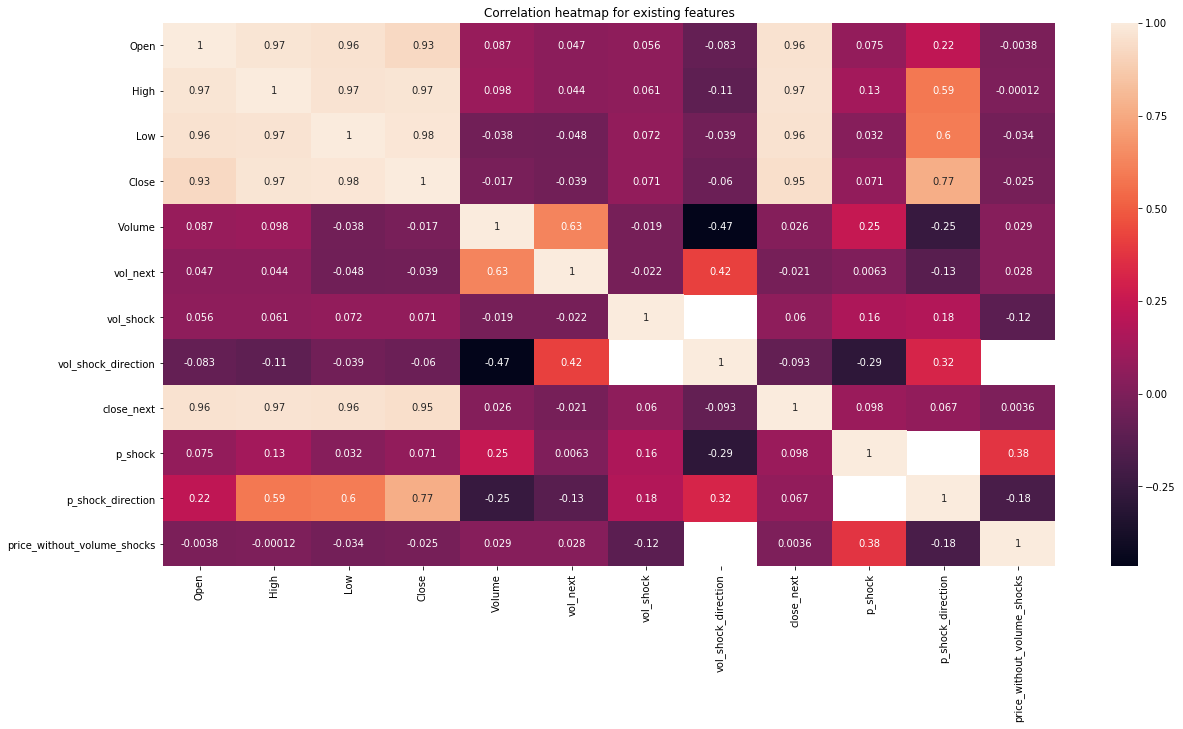

In [34]:
#plotting correlation heatmap for existing features
import seaborn as sns

c=tcs.corr()
plt.figure(figsize=(20,10))
ax=plt.axes()
sns.heatmap(c,annot=True,ax=ax)
ax.set_title("Correlation heatmap for existing features")
plt.show()


In [35]:
#Creating new dataframes with only closing prices
#thus removing all other features

new_tcs=tcs.drop(columns=['Open', 'High', 'Low', 'Volume', 'vol_next', 'vol_shock',
                      'vol_shock_direction', 'close_next', 'p_shock', 'p_shock_direction',
                      'price_without_volume_shocks'], 
                      axis=1)

new_infy=infy.drop(columns=['Open', 'High', 'Low', 'Volume', 'vol_next', 'vol_shock',
                      'vol_shock_direction', 'close_next', 'p_shock', 'p_shock_direction',
                      'price_without_volume_shocks'], 
                      axis=1)

new_tcs.name='TCS'
new_infy.name='INFY'

new_tcs.head()

,Close
Date,
2015-01-01,2545.55
2015-01-02,2579.45
2015-01-03,2579.45
2015-01-04,2579.45
2015-01-05,2540.25


In [36]:
#for feature extraction
!pip install fastai==0.7.0

     |████████████████████████████████| 122kB 4.8MB/s 
     |████████████████████████████████| 1.5MB 15.8MB/s 
     |████████████████████████████████| 3.6MB 35.6MB/s 
     |████████████████████████████████| 496.4MB 27kB/s 
     |████████████████████████████████| 61kB 24.8MB/s 
     |████████████████████████████████| 81kB 29.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.3.0 has requirement torch>=1.1.0, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0
  Found existing installation: fastai 1.0.52
    Uninstalling fastai-1.0.52:
      Successfully uninstalled fastai-1.0.52


In [0]:
#for feature extraction
from fastai.structured import add_datepart
from sklearn.preprocessing import LabelEncoder

In [0]:
def feature_extraction(df):
  df['Date']=pd.to_datetime(df.index)
  add_datepart(df,'Date')
  df.drop('Elapsed',axis=1,inplace=True)
  
  cols=['Is_month_end','Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start']
  for col in cols:
    l= LabelEncoder()
    df[col]=l.fit_transform(list(df[col].values))

In [0]:
feature_extraction(new_tcs)
feature_extraction(new_infy)

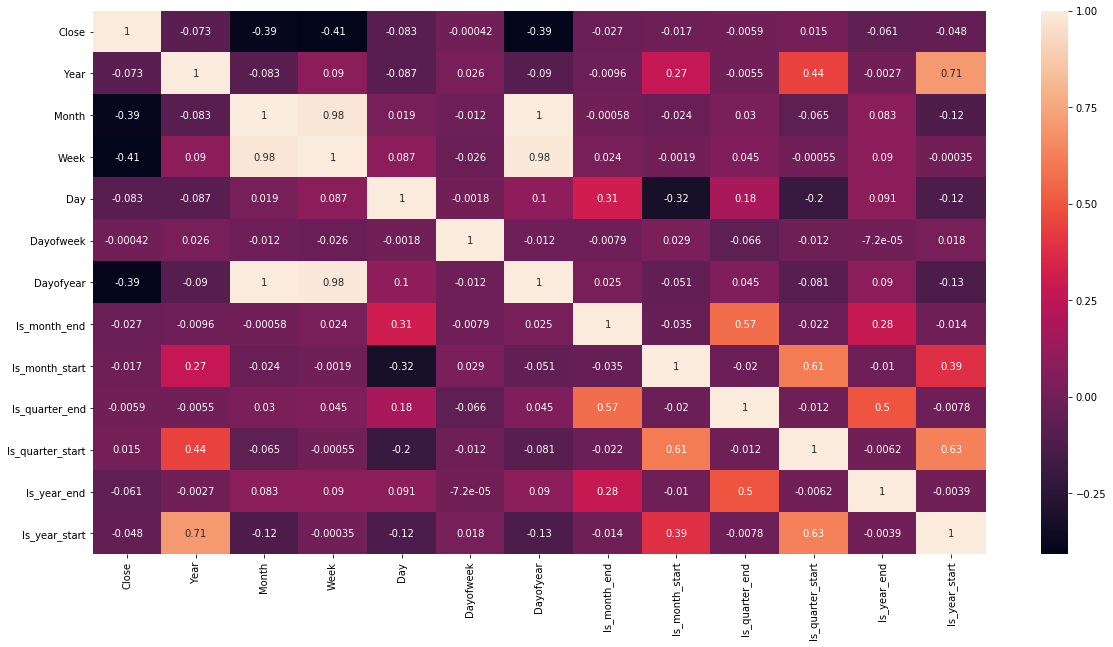

In [40]:
#further selecting features based on correlation
cor=new_tcs.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

Month and week are correlated with each other. So drop one of them(Month).<br>
Dayofweek and Is_quarter_end have very low correlation with Closing price. So drop both of them.

In [0]:
new_tcs.drop(['Month','Dayofweek','Is_quarter_end'],axis=1,inplace=True)
new_infy.drop(['Month','Dayofweek','Is_quarter_end'],axis=1,inplace=True)

In [42]:
new_tcs.head()

,Close,Year,Week,Day,Dayofyear,Is_month_end,Is_month_start,Is_quarter_start,Is_year_end,Is_year_start
Date,,,,,,,,,,
2015-01-01,2545.55,2015,1,1,1,0,1,1,0,1
2015-01-02,2579.45,2015,1,2,2,0,0,0,0,0
2015-01-03,2579.45,2015,1,3,3,0,0,0,0,0
2015-01-04,2579.45,2015,1,4,4,0,0,0,0,0
2015-01-05,2540.25,2015,2,5,5,0,0,0,0,0


In [0]:
# Calculation of Mean Absolute Percentage Error
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Modelling

In [0]:
#Imports
from sklearn import svm, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
new_tcs.head()

,Close,Year,Week,Day,Dayofyear,Is_month_end,Is_month_start,Is_quarter_start,Is_year_end,Is_year_start
Date,,,,,,,,,,
2015-01-01,2545.55,2015,1,1,1,0,1,1,0,1
2015-01-02,2579.45,2015,1,2,2,0,0,0,0,0
2015-01-03,2579.45,2015,1,3,3,0,0,0,0,0
2015-01-04,2579.45,2015,1,4,4,0,0,0,0,0
2015-01-05,2540.25,2015,2,5,5,0,0,0,0,0


In [0]:
#function to split the data into training and testing sets
def data_split(df):
  temp=df
  y=temp['Close'] 
  x=temp.loc[:,temp.columns!='Close']
  xtrain , xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)
  return xtrain , xtest, ytrain, ytest

In [0]:
#function to quickbuild Gradient Boostin Regressor
def GBR_qb(df):
  xtrain,xtest,ytrain,ytest=data_split(df)
  gbr= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(xtrain, ytrain)
  preds=gbr.predict(xtest)
  error=mape(ytest,preds)
  print("\nMape for Gradient Boosting Regressor on {} data is: {}".format(df.name,error))
  preds=pd.Series(preds)
  print("\n\nPlot of actual Closing Price\n\n")
  display(ytest.plot())
  


Mape for Gradient Boosting Regressor on TCS data is: 1.7337387076038417


Plot of actual Closing Price





Mape for Gradient Boosting Regressor on INFY data is: 2.5562903165383988


Plot of actual Closing Price




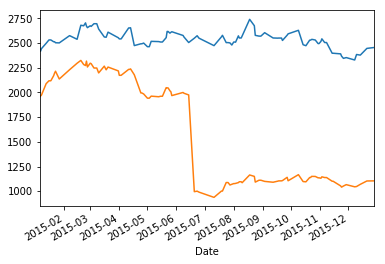

In [48]:
GBR_qb(new_tcs)
GBR_qb(new_infy)

In [0]:
#function to quickbuild SVR
def SVR_qb(df):
  xtrain, xtest, ytrain, ytest= data_split(df)
  clf=svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,tol=0.001, verbose=False)
  clf.fit(xtrain,ytrain)
  preds=clf.predict(xtest)
  error=mape(ytest,preds)
  print("Mape for SVR on {} data is: {}".format(df.name,error))



In [50]:
SVR_qb(new_tcs)
SVR_qb(new_infy)

Mape for SVR on TCS data is: 2.452362862501934
Mape for SVR on INFY data is: 24.841478615830024


**Based on initial results Gradient Boosting Regressor is **

### TUNING

In [0]:
## TUNING GBR using GridSearchCV
def gbr_tuning(df):
  xtrain, xtest, ytrain, ytest= data_split(df)
  gbr= GradientBoostingRegressor(random_state=0, loss='ls')
  estimators=[10,100,800,1000,1500,2500]
  lrs=[0.05,0.1,0.5,0.8,1.0,1.2,1.5,2]
  params={'n_estimators':estimators,'learning_rate':lrs}
  gbr_tuned=GridSearchCV(gbr,params,cv=10,scoring='neg_mean_squared_error')
  gbr_tuned.fit(xtrain,ytrain)
  print("Best Parameters Selected: {}".format(gbr_tuned.best_params_))  
  return gbr_tuned

In [52]:
SVR_qb(new_tcs)
SVR_qb(new_infy)

Mape for SVR on TCS data is: 2.452362862501934
Mape for SVR on INFY data is: 24.841478615830024


In [0]:
#function to find predictions and calculate errors
def testing_and_errors(model,df):
  xtrain, xtest, ytrain, ytest= data_split(df)
  preds=model.predict(xtest)
  print("MAPE Error for tuned Gradient Boosting Model: {}".format(mape(ytest,preds)))

In [54]:
gbr_tuned_tcs=gbr_tuning(new_tcs)
gbr_tuned_infy=gbr_tuning(new_infy)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters Selected: {'learning_rate': 0.5, 'n_estimators': 100}
Best Parameters Selected: {'learning_rate': 0.05, 'n_estimators': 800}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [55]:
testing_and_errors(gbr_tuned_tcs,new_tcs)
testing_and_errors(gbr_tuned_infy,new_infy)

MAPE Error for tuned Gradient Boosting Model: 0.6787744093502374
MAPE Error for tuned Gradient Boosting Model: 1.0049010002816943


** Error has significatly reduced from 1.733 to 0.6787 (MAPE) after tuning with GridSearchCV** 

In [56]:
print("Estimators for TCS data:\n")
print(gbr_tuned_tcs.best_estimator_)
print("\nEstimators for INFY data:\n")
print(gbr_tuned_infy.best_estimator_)

Estimators for TCS data:

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.5, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Estimators for INFY data:

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                